In [1]:
import os, sys
sys.path.insert(0, "\\".join(os.path.abspath(os.curdir).split("\\")[:-2:]))

import matplotlib.pyplot as plt
from src.utils.utils import *
import seaborn as sns

sns.set_theme()

### Extrair count metadados

#### Cabeçalho DICOM

In [2]:
path = "../../outputs/mamografia"

# Carrega os metadados extraídos dos arquivos dicom
dicom_metadata_cbis_ddsm = load_json(f"{path}/cbis-ddsm/metadata_calc_case_cbis-ddsm.json")
dicom_metadata_cbis_ddsm += load_json(f"{path}/cbis-ddsm/metadata_mass_case_cbis-ddsm.json")
dicom_metadata_cmmd = load_json(f"{path}/cmmd/metadata_cmmd.json")
dicom_metadata_inbreast = load_json(f"{path}/inbreast/metadata_inbreast.json")

database_names = ["cbis-ddsm", "cmmd", "inbreast"]
dicom_metadatas = [dicom_metadata_cbis_ddsm, dicom_metadata_cmmd, dicom_metadata_inbreast]
list_dicom_metadatas = []

for database_name, metadata in zip(database_names, dicom_metadatas):
    # Cria um dicionário com os metadados
    dataframe = pd.DataFrame(metadata)
    dataframe.replace("", np.nan, inplace=True)
    dataframe.drop(columns=['image_path'], inplace=True)

    # Conta a quantidade de metadados extraídos não nulos
    count_metadata = dataframe.count()

    # Cria e salva um dicionário com a quantidade de metadados extraídos não nulos
    dictionary_metadata = {}
    for key, value in count_metadata.items():
        if isinstance(value, np.integer):
            value = int(value)
        elif isinstance(value, np.floating):
            value = float(value)
        dictionary_metadata[key] = value
    list_dicom_metadatas.append(dictionary_metadata)

    # save_json(f"{path}/{database_name}/dictionary_count_dicom_metadata_{database_name}.json", dictionary_metadata)

#### Arquivos csv

In [3]:
metadata_cbis_ddsm = pd.read_csv(f"{path}/cbis-ddsm/metadata_calc_case_cbis-ddsm.csv")
metadata_cbis_ddsm = pd.concat([metadata_cbis_ddsm, pd.read_csv(f"{path}/cbis-ddsm/metadata_mass_case_cbis-ddsm.csv")])
metadata_cmmd = pd.read_csv(f"{path}/cmmd/metadata_cmmd.csv")
metadata_inbreast = pd.read_csv(f"{path}/inbreast/metadata_inbreast.csv")
metadata_mias = pd.read_csv(f"{path}/mias/metadata_mias.csv")

metadatas = [metadata_cbis_ddsm, metadata_cmmd, metadata_inbreast, metadata_mias]
list_metadatas = []

for metadata in metadatas:
    metadata.replace("", np.nan, inplace=True)
    metadata.drop(columns=['image_path'], inplace=True)

    if 'cropped_image_path' in metadata.columns:
        metadata.drop(columns=['cropped_image_path'], inplace=True)
    if 'roi_image_path' in metadata.columns:
        metadata.drop(columns=['roi_image_path'], inplace=True)

    # Conta a quantidade de metadados extraídos não nulos
    count_metadata = metadata.count()

    # Cria e salva um dicionário com a quantidade de metadados extraídos não nulos
    dictionary_metadata = {}
    for key, value in count_metadata.items():
        if isinstance(value, np.integer):
            value = int(value)
        elif isinstance(value, np.floating):
            value = float(value)
        dictionary_metadata[key] = value
    list_metadatas.append(dictionary_metadata)

### Função para Criar os gráficos

In [4]:
def create_bar(full, cmmd, ddsm, inbreast,label):
    fig = plt.figure(figsize=(14, 12))
    gs = fig.add_gridspec(3, 2)

    ax1 = plt.subplot(gs[0, ::])
    ax = sns.barplot(x='frequencia', y=label, ax=ax1, data=full)
    ax1.set_title(f"Quantidade de {label} DICOM por frequência - Total", size=14, pad=20)
    ax1.set_xlabel("Frequência", size=14)
    ax1.set_ylabel(f"Quantidade de {label}", size=14)
    ax1.bar_label(ax.containers[0], fmt="%.01d", size=13, label_type="edge")

    ax2 = plt.subplot(gs[1:2, :1:])
    ax = sns.barplot(x='frequencia', y=label, ax=ax2, data=cmmd)
    ax2.set_title(f"Quantidade de {label} DICOM por frequência - CMMD", size=14, pad=20)
    ax2.set_xlabel("Frequência", size=14)
    ax2.set_ylabel(f"Quantidade de {label}", size=14)
    ax2.bar_label(ax.containers[0], fmt="%.01d", size=13, label_type="edge")

    ax3 = plt.subplot(gs[1:2, 1::])
    ax = sns.barplot(x='frequencia', y=label, ax=ax3, data=ddsm)
    ax3.set_title(f"Quantidade de {label} DICOM por frequência - CBIS-DDSM", size=14, pad=20)
    ax3.set_xlabel("Frequência", size=14)
    ax3.set_ylabel(f"Quantidade de {label}", size=14)
    ax3.bar_label(ax.containers[0], fmt="%.01d", size=13, label_type="edge")

    ax4 = plt.subplot(gs[2, :1:])
    ax = sns.barplot(x='frequencia', y=label, ax=ax4, data=inbreast)
    ax4.set_title(f"Quantidade de {label} DICOM por frequência - INBreast", size=14, pad=20)
    ax4.set_xlabel("Frequência", size=14)
    ax4.set_ylabel(f"Quantidade de {label}", size=14)
    ax4.bar_label(ax.containers[0], fmt="%.01d", size=13, label_type="edge")

    plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.show()

### Gráfico de tags do DICOM

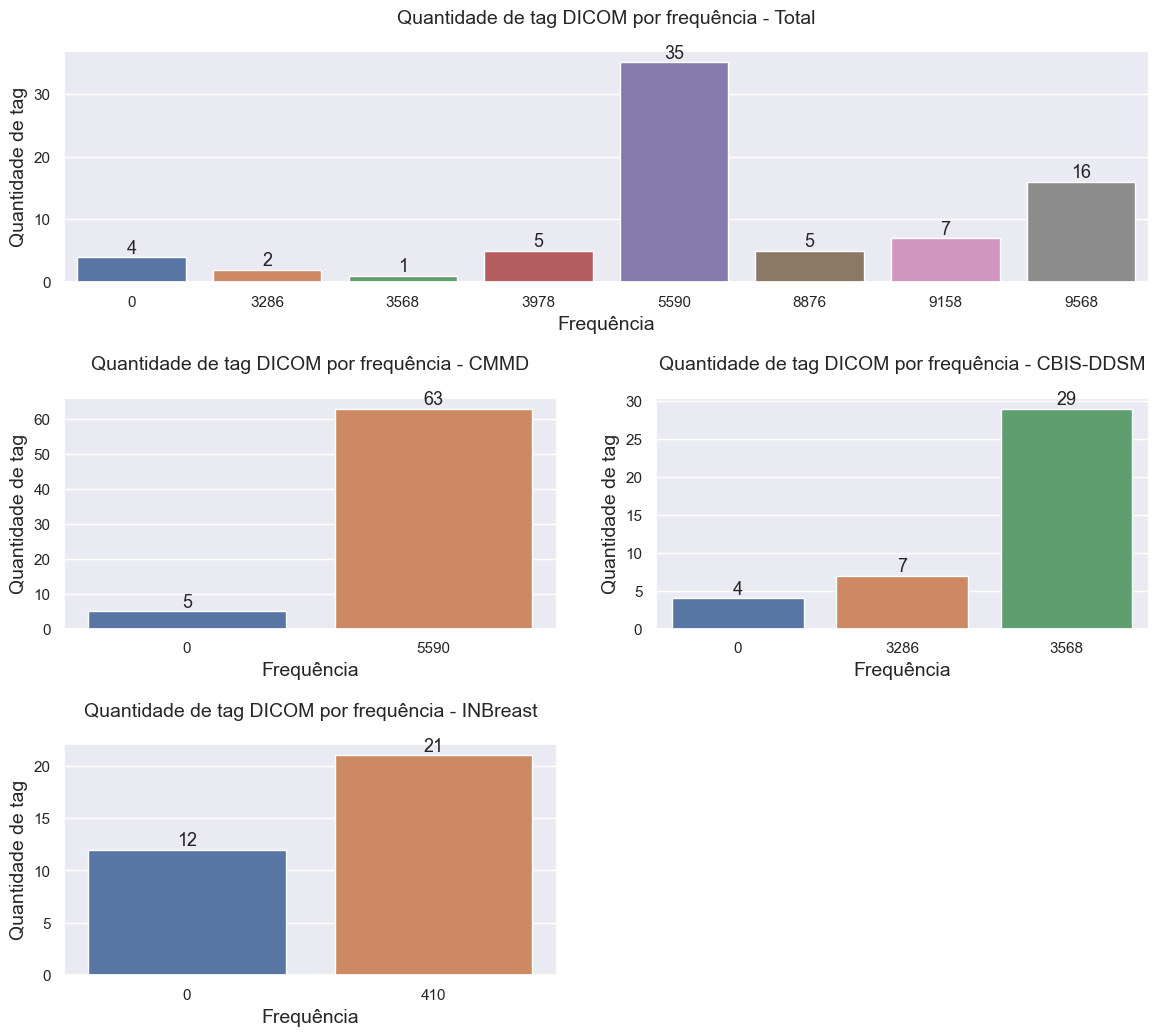

In [5]:
df_cbis_ddsm = create_df(list_dicom_metadatas[0], 'tag')
df_cmmd = create_df(list_dicom_metadatas[1], 'tag')
df_inbreast = create_df(list_dicom_metadatas[2], 'tag')

full_dict = {key: list_dicom_metadatas[0].get(key, 0) + list_dicom_metadatas[1].get(key, 0)
             for key in set(list_dicom_metadatas[0]) | set(list_dicom_metadatas[1])}
full_dict = {key: full_dict.get(key, 0) + list_dicom_metadatas[2].get(key, 0)
             for key in set(full_dict) | set(list_dicom_metadatas[2])}
df_full = create_df(full_dict, 'tag')

full = df_full.groupby("frequencia", as_index=False).count()
cbis_ddsm = df_cbis_ddsm.groupby("frequencia", as_index=False).count()
cmmd = df_cmmd.groupby("frequencia", as_index=False).count()
inbreast = df_inbreast.groupby("frequencia", as_index=False).count()

create_bar(full, cmmd, cbis_ddsm, inbreast, 'tag')

### Buscar tags pela frequência

In [6]:
"""---Opcões de parâmetros para função buscar_tags---
    Dataframe: df_full - Frequencias possíveis: [0, 3286, 3568, 3978, 5590, 8876, 9158, 9568]
    Dataframe: df_cmmd - Frequencias possíveis: [0, 5590]
    Dataframe: df_cbis_ddsm - Frequencias possíveis: [0, 3286, 3568]
    DataFrame: df_inbreast - Frequencias possíveis: [0, 410]
"""
print("Full", df_full.frequencia.unique())
print("Cmmd", df_cmmd.frequencia.unique())
print("Cbis-ddsm", df_cbis_ddsm.frequencia.unique())
print("Inbreast", df_inbreast.frequencia.unique())

Full [5590 8876 9568 3568 9158 3978 3286    0]
Cmmd [5590    0]
Cbis-ddsm [3568 3286    0]
Inbreast [410   0]


In [7]:
buscar_tags(df_full, 9568)[['tag']].to_csv("../../outputs/inserts_mongodb/required_dicom.csv", index=False)

df_tmp = pd.DataFrame()

freqs_optional = [8876, 9158]
for freq in freqs_optional:
    df_tmp = pd.concat([df_tmp, buscar_tags(df_full, freq)])
df_tmp = df_tmp.reset_index(drop=True)

df_tmp[['tag']].to_csv("../../outputs/inserts_mongodb/optional_dicom.csv", index=False)

### Gráfico de atributos extraídos dos arquivos csv, xlsx e txt

#### Quantidade de atributos por frequência dos bancos CMMD, DDSM e InBreast

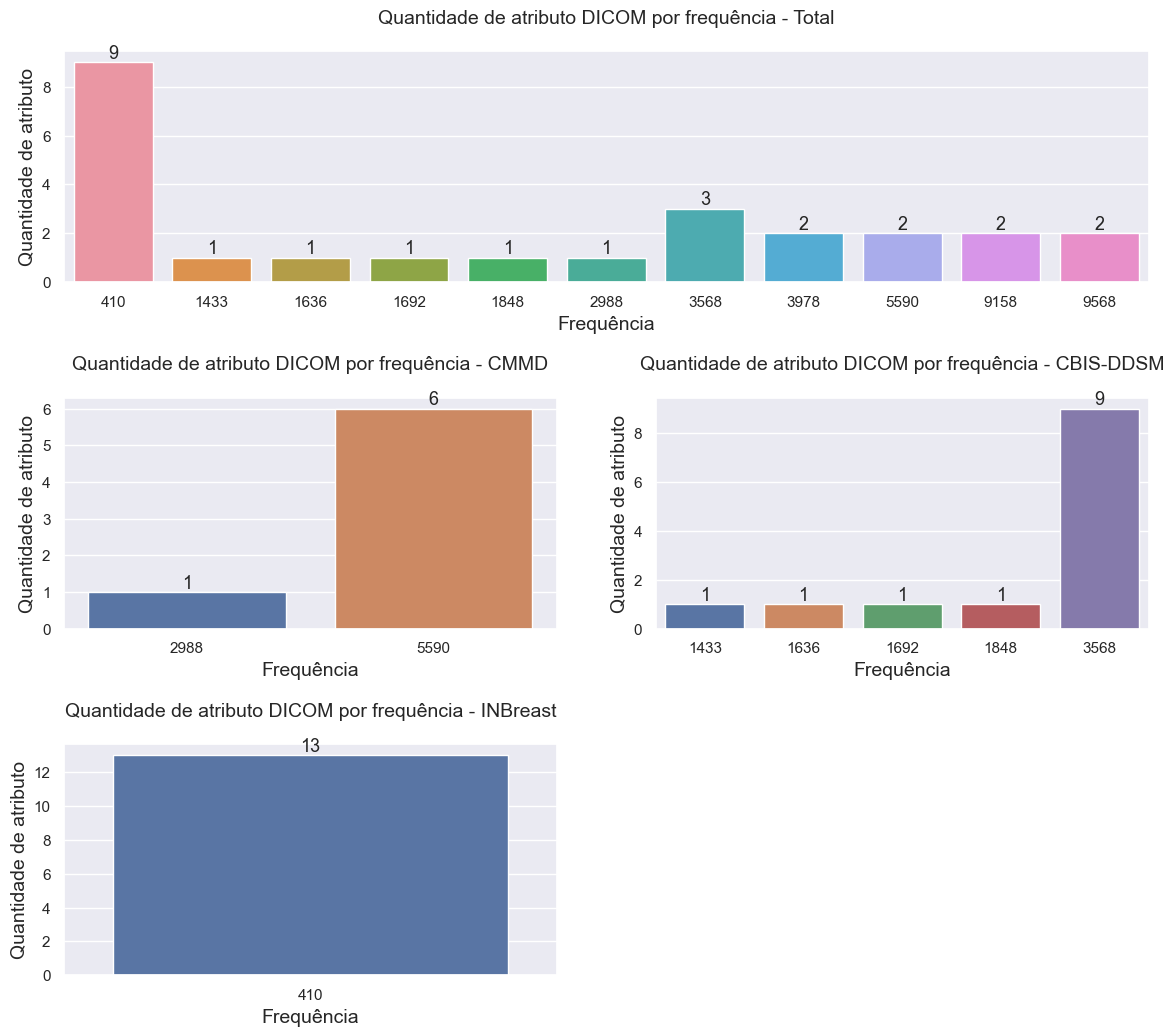

In [8]:
df_cbis_ddsm = create_df(list_metadatas[0], 'atributo')
df_cmmd = create_df(list_metadatas[1], 'atributo')
df_inbreast = create_df(list_metadatas[2], 'atributo')
df_mias = create_df(list_metadatas[3], 'atributo')

full_dict = {key: list_metadatas[0].get(key, 0) + list_metadatas[1].get(key, 0)
             for key in set(list_metadatas[0]) | set(list_metadatas[1])}
full_dict = {key: full_dict.get(key, 0) + list_metadatas[2].get(key, 0)
             for key in set(full_dict) | set(list_metadatas[2])}
df_full = create_df(full_dict, 'atributo')

full = df_full.groupby("frequencia", as_index=False).count()
cbis_ddsm = df_cbis_ddsm.groupby("frequencia", as_index=False).count()
cmmd = df_cmmd.groupby("frequencia", as_index=False).count()
inbreast = df_inbreast.groupby("frequencia", as_index=False).count()
mias = df_mias.groupby("frequencia", as_index=False).count()

create_bar(full, cmmd, cbis_ddsm, inbreast, 'atributo')

#### Frequência dos atributos do banco MIAS

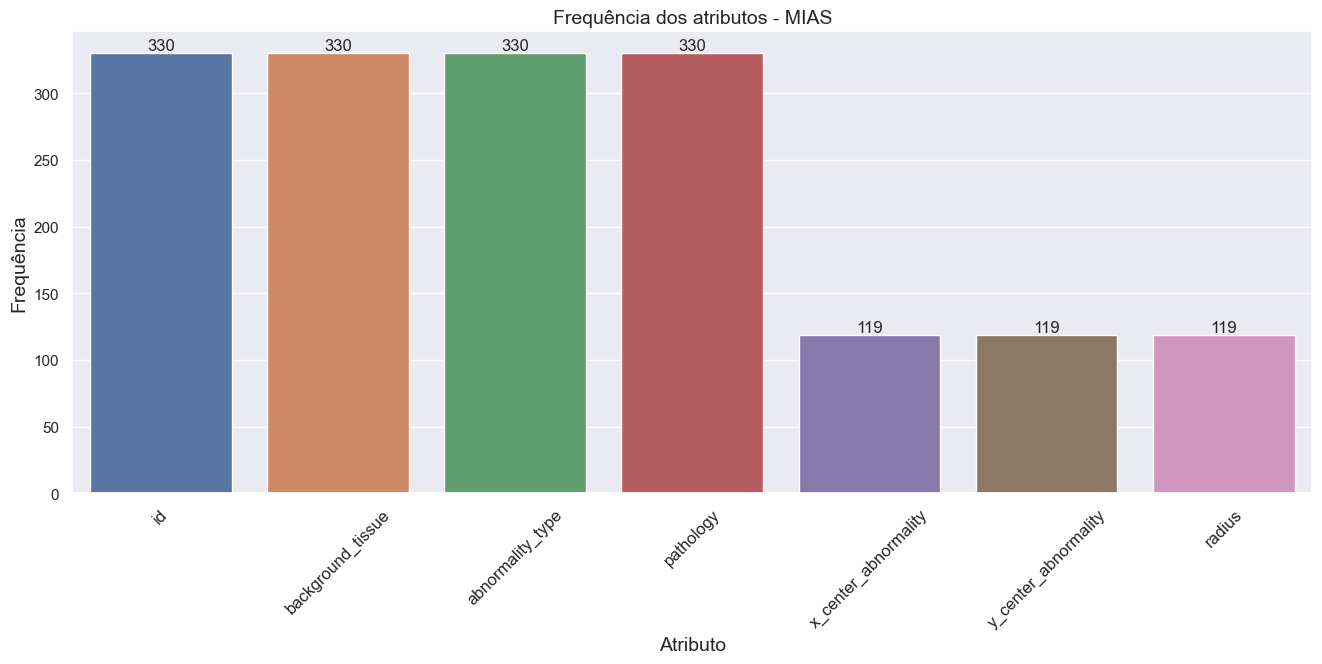

In [9]:
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df_mias, x='atributo', y='frequencia')
plt.title("Frequência dos atributos - MIAS", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=45, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - FULL Dictionary atributes

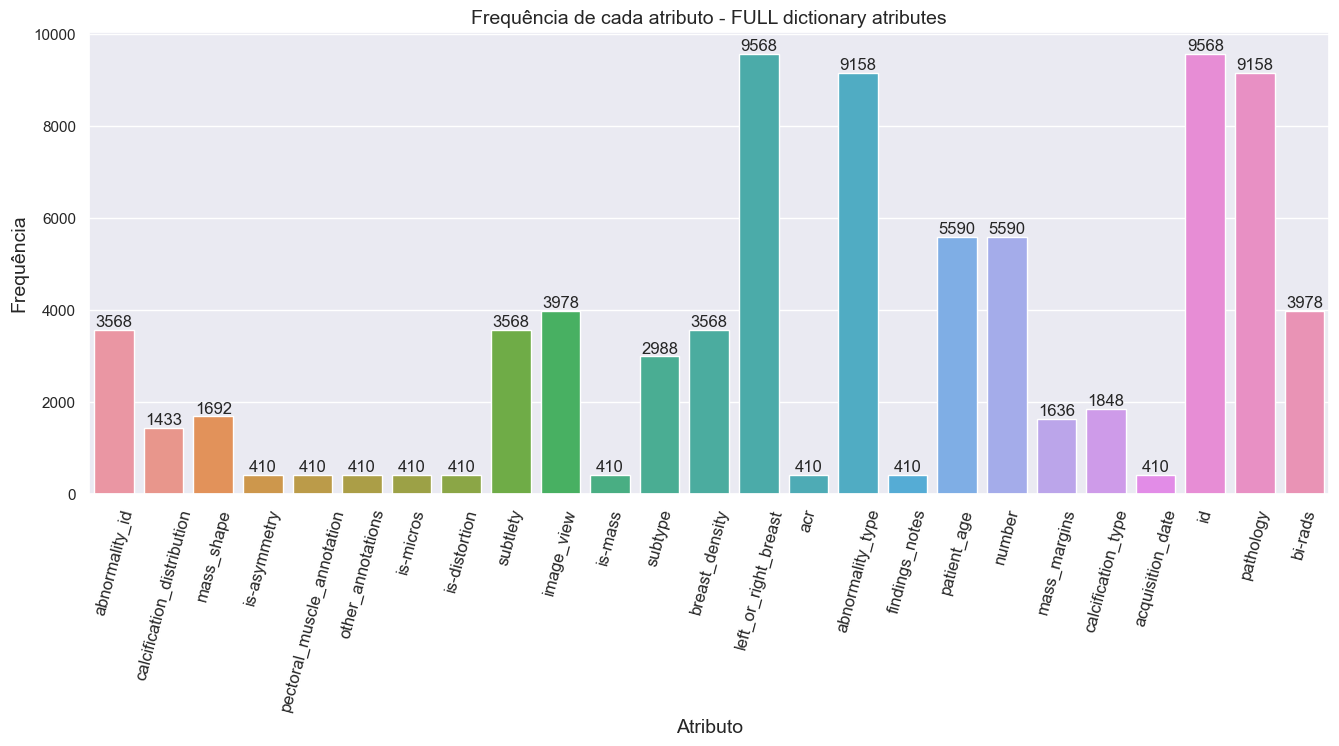

In [10]:
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df_full, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - FULL dictionary atributes", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=75, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - CMMD

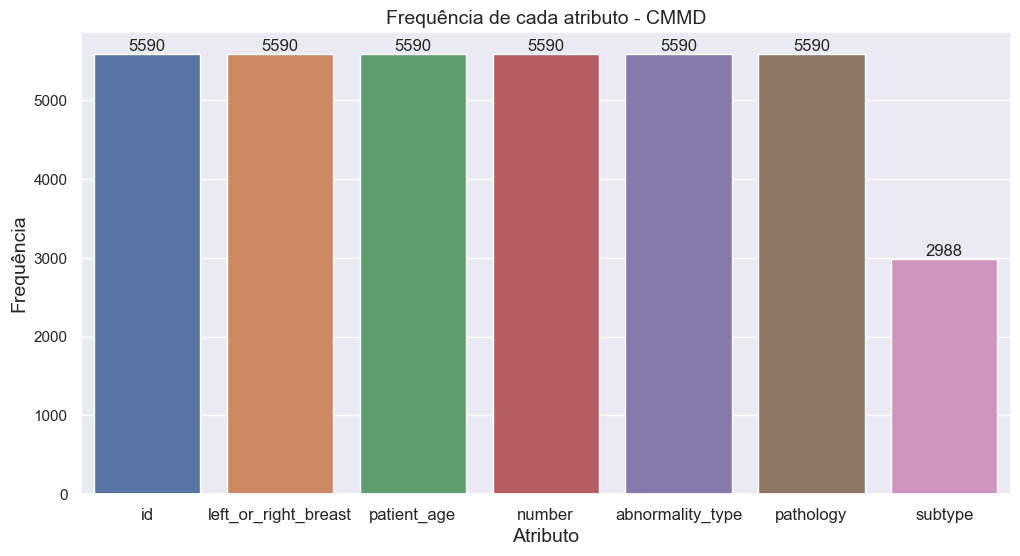

In [11]:
fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_cmmd, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - CMMD", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=0, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - CBIS-DDSM

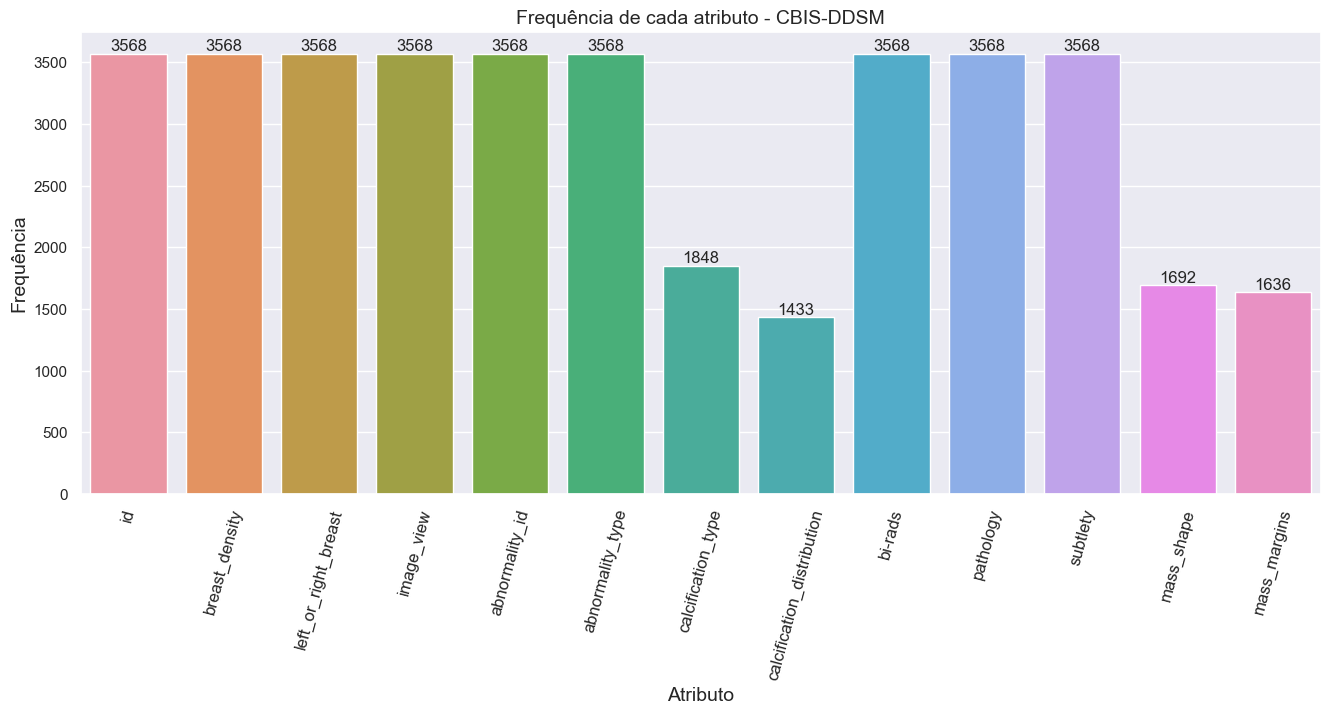

In [12]:
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df_cbis_ddsm, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - CBIS-DDSM", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=75, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - INBreast

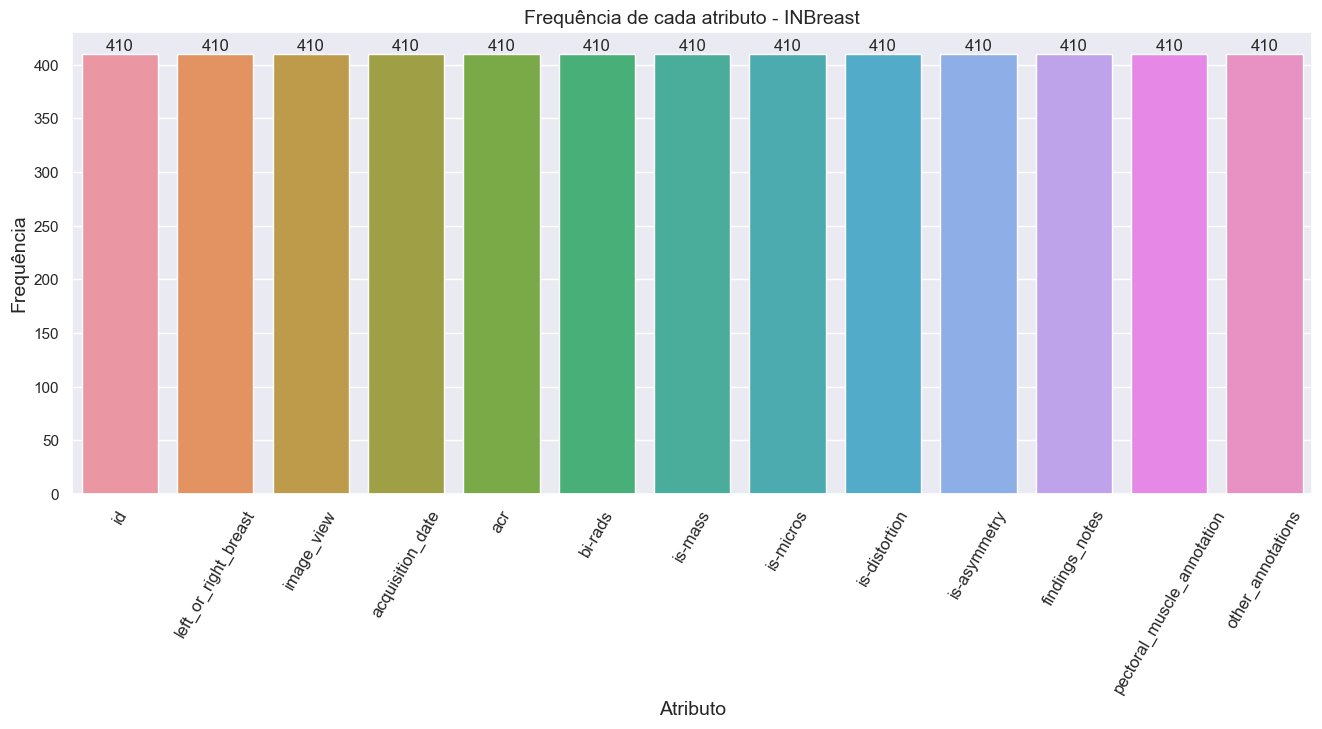

In [13]:
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df_inbreast, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - INBreast", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=60, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - MIAS

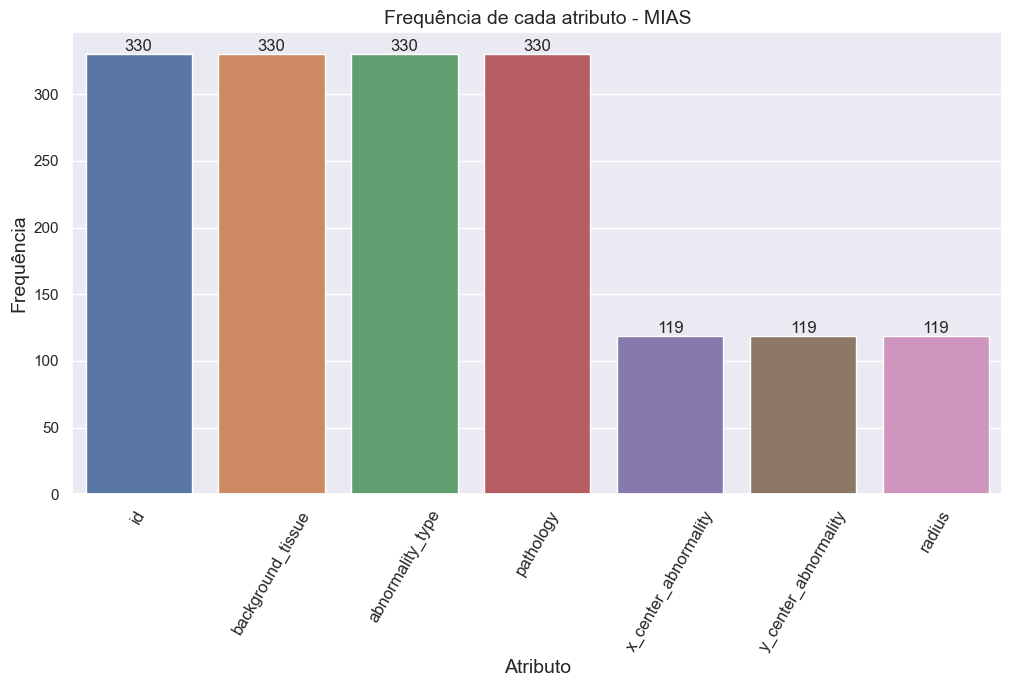

In [14]:
fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_mias, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - MIAS", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=60, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()